## Forest Fires in Brazil

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv(r"C:\Users\User\Downloads\Compressed\archive_9\amazon.csv", encoding = 'iso-8859-1', parse_dates = ['date'])

In [11]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [12]:
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

## Display top 5 rows

In [13]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


## Display last 5 rows

In [14]:
data.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


## Find out the shape of the data

In [15]:
data.shape

(6454, 5)

## Information about the data

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


## Check for duplicate data and drop them

In [17]:
data.duplicated().any()

True

In [20]:
len(data[data.duplicated()])

32

In [22]:
data = data.drop_duplicates()

## Check null values in the dataset

In [23]:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

## Overall statistics

In [25]:
data.describe(include = 'all')

C:\Users\User\AppData\Local\Temp\ipykernel_16268\4280773600.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include = 'all')


,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,20
top,NaN,Rio,Agosto,NaN,2015-01-01 00:00:00
freq,NaN,697,540,NaN,324
first,NaN,NaN,NaN,NaN,1998-01-01 00:00:00
last,NaN,NaN,NaN,NaN,2017-01-01 00:00:00
mean,2007.490969,NaN,NaN,108.815178,NaN
std,5.731806,NaN,NaN,191.142482,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2003.000000,NaN,NaN,3.000000,NaN


## Rename month names to English

In [26]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [27]:
data['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [28]:
data['month_new'] = data['month'].map({'Janeiro': 'January',
                                      'Fevereiro': 'February',
                                      'Março': 'March',
                                      'Abril': 'April',
                                      'Maio': 'May',
                                      'Junho': 'June',
                                      'Julho': 'July',
                                      'Agosto': 'August',
                                      'Setembro': 'September',
                                      'Outubro': 'October',
                                      'Novembro': 'November',
                                      'Dezembro': 'December'})

In [30]:
data

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,January
1,1999,Acre,Janeiro,0.0,1999-01-01,January
2,2000,Acre,Janeiro,0.0,2000-01-01,January
3,2001,Acre,Janeiro,0.0,2001-01-01,January
4,2002,Acre,Janeiro,0.0,2002-01-01,January
...,...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01,December
6450,2013,Tocantins,Dezembro,85.0,2013-01-01,December
6451,2014,Tocantins,Dezembro,223.0,2014-01-01,December
6452,2015,Tocantins,Dezembro,373.0,2015-01-01,December


## Total number of fires registered

In [31]:
print('The total number of fires registered are: ', data.shape[0])

The total number of fires registered are:  6422


## In Which Month Maximum Number of Forest Fires Were Reported?

In [35]:
data

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,January
1,1999,Acre,Janeiro,0.0,1999-01-01,January
2,2000,Acre,Janeiro,0.0,2000-01-01,January
3,2001,Acre,Janeiro,0.0,2001-01-01,January
4,2002,Acre,Janeiro,0.0,2002-01-01,January
...,...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01,December
6450,2013,Tocantins,Dezembro,85.0,2013-01-01,December
6451,2014,Tocantins,Dezembro,223.0,2014-01-01,December
6452,2015,Tocantins,Dezembro,373.0,2015-01-01,December


In [44]:
data1 = data.groupby('month_new')['number'].sum().reset_index()

<Axes: xlabel='number', ylabel='month_new'>

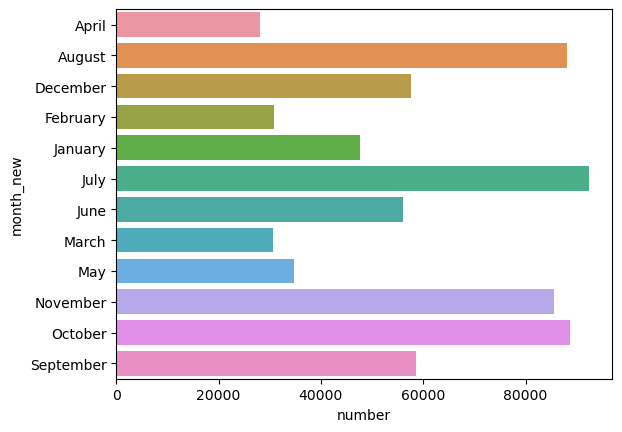

In [45]:
sns.barplot(x= 'number', y = 'month_new', data = data1)

## In Which Year Maximum Number of Forest Fires Was Reported?

In [46]:
data.head()

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,January
1,1999,Acre,Janeiro,0.0,1999-01-01,January
2,2000,Acre,Janeiro,0.0,2000-01-01,January
3,2001,Acre,Janeiro,0.0,2001-01-01,January
4,2002,Acre,Janeiro,0.0,2002-01-01,January


In [55]:
data2 = data.groupby('year')['number'].sum().reset_index()
data2

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


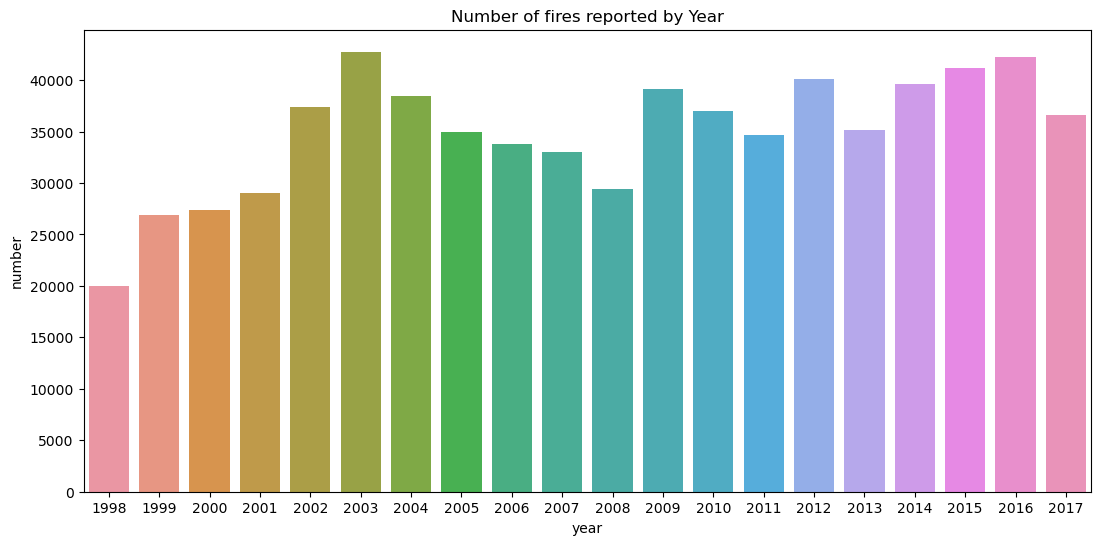

In [61]:
plt.figure(figsize = (13, 6))
sns.barplot(x = 'year', y = 'number', data = data2)
plt.title('Number of fires reported by Year')
plt.show()

## In Which State Maximum Number of Forest Fires Was Reported?

In [62]:
data.head()

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,January
1,1999,Acre,Janeiro,0.0,1999-01-01,January
2,2000,Acre,Janeiro,0.0,2000-01-01,January
3,2001,Acre,Janeiro,0.0,2001-01-01,January
4,2002,Acre,Janeiro,0.0,2002-01-01,January


In [67]:
data3 = data.groupby('state')['number'].sum().reset_index()

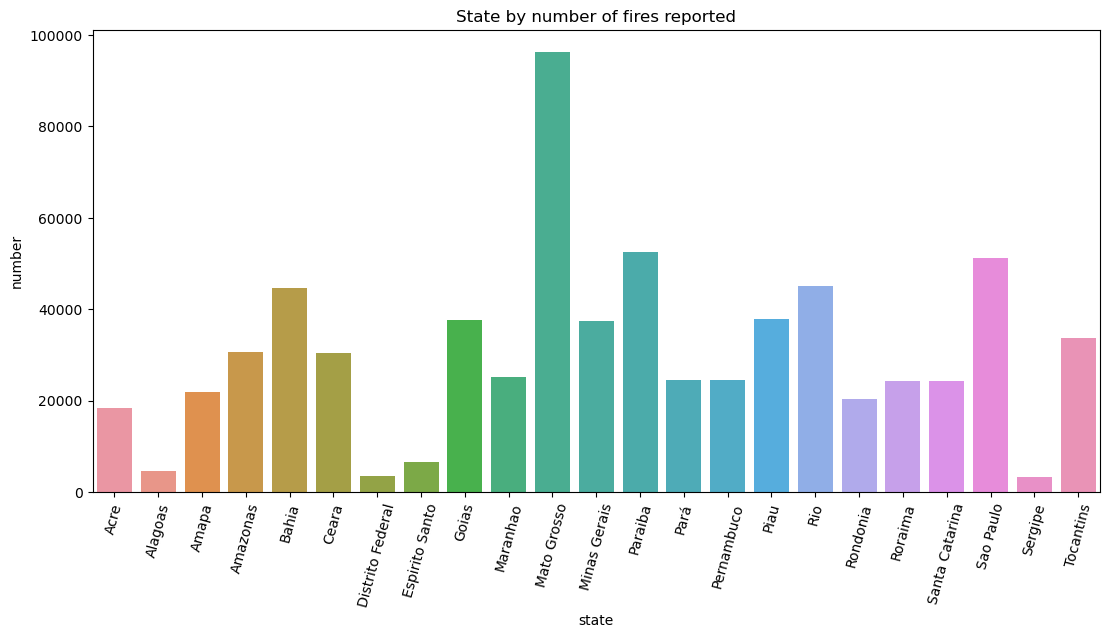

In [77]:
plt.figure(figsize = (13, 6))
sns.barplot(x = 'state', y = 'number', data = data3)
plt.xticks(rotation = 75)
plt.title('State by number of fires reported')
plt.show()

## Find Total Number of Fires Were Reported In Amazonas

In [81]:
data[data['state'] == 'Amazonas']

,year,state,month,number,date,month_new
718,1998,Amazonas,Janeiro,0.0,1998-01-01,January
719,1999,Amazonas,Janeiro,3.0,1999-01-01,January
720,2000,Amazonas,Janeiro,7.0,2000-01-01,January
721,2001,Amazonas,Janeiro,3.0,2001-01-01,January
722,2002,Amazonas,Janeiro,17.0,2002-01-01,January
...,...,...,...,...,...,...
952,2012,Amazonas,Dezembro,80.0,2012-01-01,December
953,2013,Amazonas,Dezembro,236.0,2013-01-01,December
954,2014,Amazonas,Dezembro,293.0,2014-01-01,December
955,2015,Amazonas,Dezembro,565.0,2015-01-01,December


In [90]:
data.groupby('state')['number'].sum().reset_index()

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


## OR

In [92]:
data[data['state'] == 'Amazonas']['number'].sum()

30650.129

## Display Number of Fires Were Reported In Amazonas (Year-Wise)

In [94]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [103]:
data4 = data[data['state'] == 'Amazonas']
data4

,year,state,month,number,date,month_new
718,1998,Amazonas,Janeiro,0.0,1998-01-01,January
719,1999,Amazonas,Janeiro,3.0,1999-01-01,January
720,2000,Amazonas,Janeiro,7.0,2000-01-01,January
721,2001,Amazonas,Janeiro,3.0,2001-01-01,January
722,2002,Amazonas,Janeiro,17.0,2002-01-01,January
...,...,...,...,...,...,...
952,2012,Amazonas,Dezembro,80.0,2012-01-01,December
953,2013,Amazonas,Dezembro,236.0,2013-01-01,December
954,2014,Amazonas,Dezembro,293.0,2014-01-01,December
955,2015,Amazonas,Dezembro,565.0,2015-01-01,December


In [106]:
data5 = data4.groupby('year')['number'].sum().reset_index()
data5

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


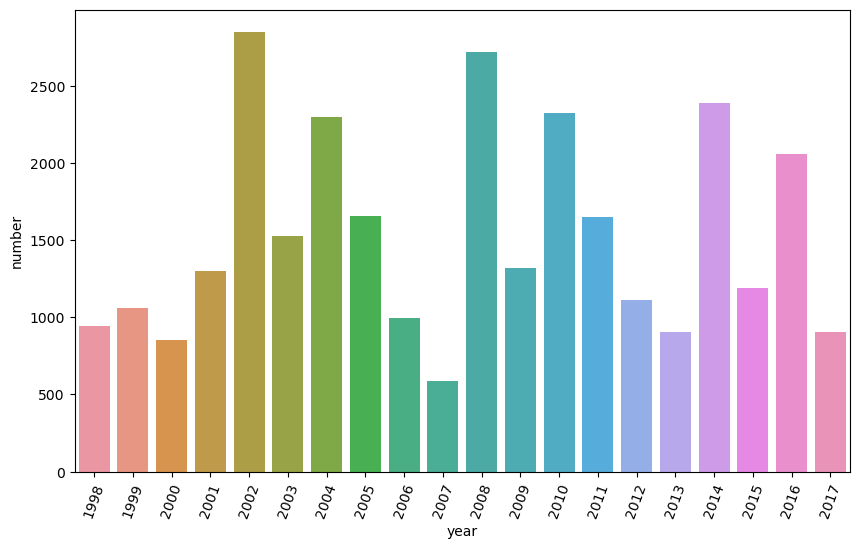

In [110]:
plt.figure(figsize = (10, 6))
sns.barplot(x= 'year', y= 'number', data = data5)
plt.xticks(rotation = 70)
plt.show()

## Display Number of Fires Were Reported In Amazonas (Day-Wise)

In [111]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [123]:
data6 = data[data['state'] == 'Amazonas']
data6

,year,state,month,number,date,month_new
718,1998,Amazonas,Janeiro,0.0,1998-01-01,January
719,1999,Amazonas,Janeiro,3.0,1999-01-01,January
720,2000,Amazonas,Janeiro,7.0,2000-01-01,January
721,2001,Amazonas,Janeiro,3.0,2001-01-01,January
722,2002,Amazonas,Janeiro,17.0,2002-01-01,January
...,...,...,...,...,...,...
952,2012,Amazonas,Dezembro,80.0,2012-01-01,December
953,2013,Amazonas,Dezembro,236.0,2013-01-01,December
954,2014,Amazonas,Dezembro,293.0,2014-01-01,December
955,2015,Amazonas,Dezembro,565.0,2015-01-01,December


In [134]:
day = data6.groupby(data6['date'].dt.dayofweek)['number'].sum()

import calendar

day.index = [calendar.day_name[x] for x in range(0,7)]
day = day.reset_index()

In [135]:
day

,index,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


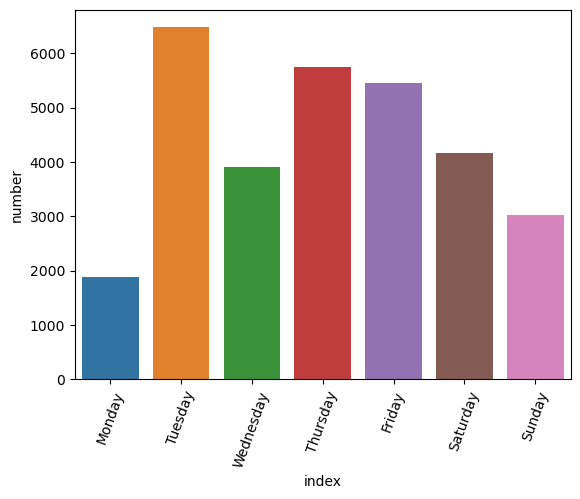

In [139]:
sns.barplot(x = 'index', y = 'number', data =day)
plt.xticks(rotation = 70)
plt.show()

## Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’

In [140]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [150]:
data7 = data[data['year'] == 2015].groupby('month_new')['number'].sum().reset_index()
data7

,month_new,number
0,April,2573.000
1,August,4363.125
2,December,4088.522
3,February,2309.000
4,January,4635.000
5,July,4364.392
6,June,3260.552
7,March,2202.000
8,May,2384.000
9,November,4034.518


<Axes: xlabel='month_new', ylabel='number'>

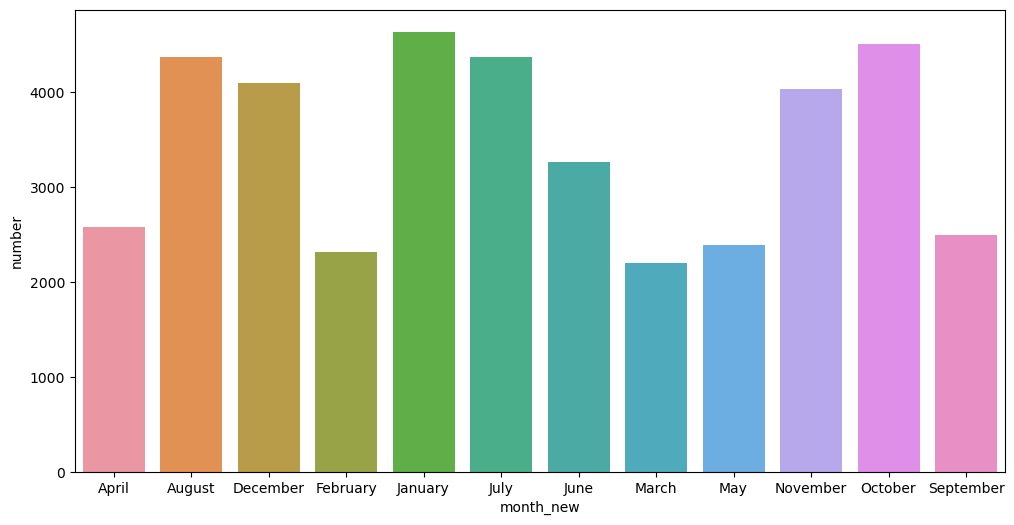

In [153]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'month_new', y = 'number', data = data7)

## Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)

In [154]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [158]:
fire_avg = data.groupby('state')['number'].mean().sort_values(ascending = False).reset_index()
fire_avg

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


<Axes: xlabel='number', ylabel='state'>

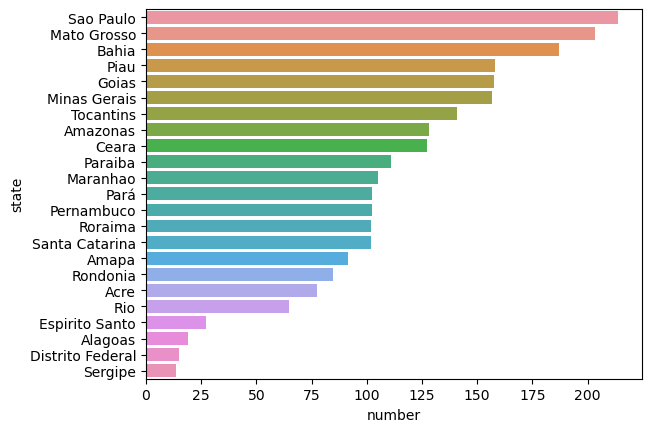

In [159]:
sns.barplot(x = 'number', y = 'state', data = fire_avg)

## To Find The State Names Where Fires Were Reported In 'dec' Month

In [160]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [165]:
data[data['month_new'] == 'December']['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)